In [6]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras_preprocessing.sequence import pad_sequences
#from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, Conv1D, LSTM
from keras.layers import GlobalMaxPooling1D
#from tensorflow.keras.layers import Embedding
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [8]:
path = "./data/Sentiment140.tenPercent.sample.tweets.csv"

In [9]:
df = pd.read_csv(path, sep="\t", on_bad_lines='skip', encoding = "ISO-8859-1") 
df.head()

,sentiment_label,tweet_text
0,4,"@elephantbird Hey dear, Happy Friday to You A..."
1,4,Ughhh layin downnnn Waiting for zeina to co...
2,0,"@greeniebach I reckon he'll play, even if he's..."
3,0,@vaLewee I know! Saw it on the news!
4,0,very sad that http://www.fabchannel.com/ has c...


In [10]:
print(df.columns)
print(df.isna().sum())
print(df.shape)

Index(['sentiment_label', 'tweet_text'], dtype='object')
sentiment_label    0
tweet_text         0
dtype: int64
(160000, 2)


In [11]:
df["tweet_text"][3]

'@vaLewee I know!  Saw it on the news!'

<AxesSubplot: xlabel='sentiment_label', ylabel='count'>

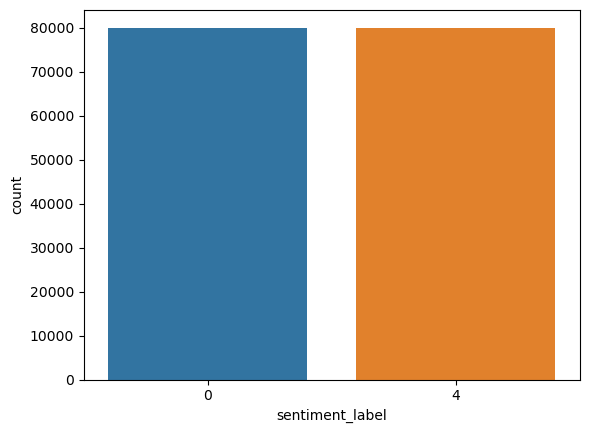

In [13]:
import seaborn as sns

sns.countplot(x='sentiment_label', data=df)

In [14]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [15]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [16]:
X = []
sentences = list(df['tweet_text'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [17]:
X[3]

' vaLewee know Saw it on the news '

In [18]:
y = df['sentiment_label']

y = np.array(list(map(lambda x: 1 if x==4 else 0, y)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)